### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [191]:
data = pd.read_csv('data/coupons.csv')

In [193]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [199]:
#Drop the Car column as it is mostly empty
data.drop('car',axis=1,inplace=True)
#Drop any null rows in the value set
clean=data.dropna(subset= ['Bar','RestaurantLessThan20','CarryAway','Restaurant20To50','CoffeeHouse'])
#Drop any duplicate entries
cleaned=clean.drop_duplicates()

4. What proportion of the total observations chose to accept the coupon?



In [202]:
#Total population
total_rows= len(cleaned)
#How many people said yes to the coupon
Coupon_Yes= cleaned['Y'].sum()
Percent_Yes=Coupon_Yes / total_rows * 100
print(f'The proportion of the total observations chose to accept the coupon was {Percent_Yes:.2f}%.')

The proportion of the total observations chose to accept the coupon was 56.84%.


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

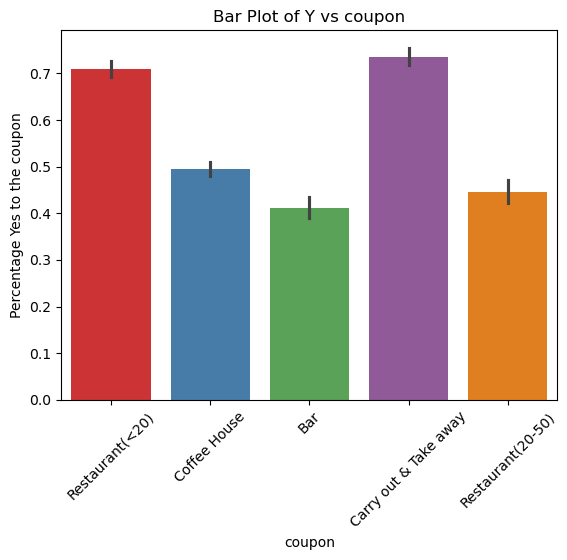

In [205]:
sns.barplot(data=cleaned,x='coupon',y='Y', hue='coupon')
sns.set_palette('Set1')
plt.title('Bar Plot of Y vs coupon')
plt.xlabel('coupon')
plt.ylabel('Percentage Yes to the coupon')
plt.xticks(rotation=45)


6. Use a histogram to visualize the temperature column.

(array([20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90')])

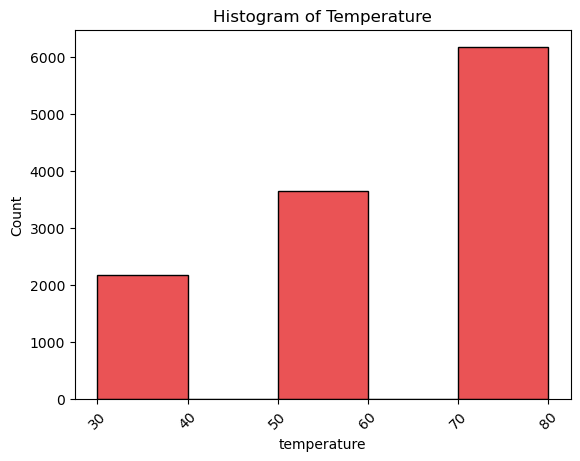

In [208]:
sns.histplot(cleaned, x='temperature', bins=5)
sns.set_palette('Set1')
plt.title('Histogram of Temperature')
plt.xticks(rotation=45)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [215]:
#Create new df with only 'Coupon'='Bar' data
Coupon_bar_cleaned=cleaned[cleaned['coupon']=='Bar']
Coupon_bar_cleaned.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [218]:
#Total bar population
total_rows_bar= len(Coupon_bar_cleaned)
#How many people said yes to the bar coupon
Coupon_Yes_bar= Coupon_bar_cleaned['Y'].sum()
Percent_Yes_bar=Coupon_Yes_bar / total_rows_bar * 100
print(f'The proportion of the bar coupons that were accepted was {Percent_Yes_bar:.2f}%.')

The proportion of the bar coupons that were accepted was 41.19%.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [221]:
#Split Data
bar_3_or_fewer=Coupon_bar_cleaned[Coupon_bar_cleaned['Bar'].isin(['never', 'less1', '1~3'])]
bar_more_than_3= Coupon_bar_cleaned[Coupon_bar_cleaned['Bar'].isin(['gt8', '4~8'])]
#Calculate acceptance rate of each
bar_3_or_fewer_per_Y= bar_3_or_fewer['Y'].sum()/len(bar_3_or_fewer) *100
bar_more_than_3_per_Y= bar_more_than_3['Y'].sum()/len(bar_more_than_3) *100
print(f'The acceptance rate of those who went to a bar 3 or fewer times a month was {bar_3_or_fewer_per_Y:.2f}%.')
print(f'The acceptance rate of those who went to a bar more than 3 times a month was {bar_more_than_3_per_Y:.2f}%.')


The acceptance rate of those who went to a bar 3 or fewer times a month was 37.24%.
The acceptance rate of those who went to a bar more than 3 times a month was 76.17%.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [234]:
#Bad question you are asking more than one a month: should be once or more times a month
#narrow data to include greater than 8 4-8 and 1-3
bar_more_than_once= Coupon_bar_cleaned[Coupon_bar_cleaned['Bar'].isin(['gt8', '4~8','1~3'])]
#narrow data to include only people over 'age' 25
bar_more_than_once_25= bar_more_than_once[bar_more_than_once['age'].isin(['26','31','36','41','50plus'])]
#calculate the percentage
bar_more_than_once_25_per_Y= bar_more_than_once_25['Y'].sum()/len(bar_more_than_once_25) *100
#Compare the rate vs 3 times or more from above and determine if there is a difference
if bar_more_than_once_25_per_Y > bar_more_than_3_per_Y:
    print(f'The acceptance rate of those who went to a bar once or more per month and were over the age of 25 was HIGHER at {bar_more_than_once_25_per_Y:.2f}% than 3 times a month was at {bar_more_than_3_per_Y:.2f}%')
else:
    print(f'The acceptance rate of those who went to a bar once or more per month and were over the age of 25 was LOWER at {bar_more_than_once_25_per_Y:.2f}% than 3 times a month was at {bar_more_than_3_per_Y:.2f}%')

The acceptance rate of those who went to a bar once or more per month and were over the age of 25 was LOWER at 68.73% than 3 times a month was at 76.17%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [256]:
#narrow data to include only people with a 'passenger' other than kid(s)
bar_more_than_once_pass= bar_more_than_once[bar_more_than_once['passanger'] != 'Kid(s)']
#narrow data to remove 'occupation' farming, fishing, or forestry
bar_more_than_once_pass_farm= bar_more_than_once_pass[bar_more_than_once_pass['occupation'] != 'Farming Fishing & Forestry']
#calculate the percentage
bar_more_than_once_pass_farm_Y= bar_more_than_once_pass_farm['Y'].sum()/len(bar_more_than_once_pass_farm) *100
#Compare the rate vs 3 times or more from above and determine if there is a difference
if bar_more_than_once_pass_farm_Y > bar_more_than_3_per_Y:
    print(f'The acceptance rate of those who went to a bar once or more per month and had a passenger other than kid(s) was HIGHER at {bar_more_than_once_pass_farm_Y:.2f}% than 3 times a month was at {bar_more_than_3_per_Y:.2f}%')
else:
    print(f'The acceptance rate of those who went to a bar once or more per month and had a passenger other than kid(s) was LOWER at {bar_more_than_once_pass_farm_Y:.2f}% than 3 times a month was at {bar_more_than_3_per_Y:.2f}%')

The acceptance rate of those who went to a bar once or more per month and had a passenger other than kid(s) was LOWER at 70.94% than 3 times a month was at 76.17%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [280]:
#narrow data with previous as start

# bars more than once a month, had passengers that were not a kid, and were not widowed
bar_more_than_once_pass_nw=bar_more_than_once_pass[bar_more_than_once_pass['maritalStatus'] != 'Widowed']
#calculate the percentage
bar_more_than_once_pass_nw_Y= bar_more_than_once_pass_nw['Y'].sum()/len(bar_more_than_once_pass_nw) *100

#go to bars more than once a month and are under the age of 30
bar_more_than_once_under30=bar_more_than_once[bar_more_than_once['age'].isin(['26','21','below21'])]
#calculate the percentage
bar_more_than_once_under30_Y= bar_more_than_once_under30['Y'].sum()/len(bar_more_than_once_under30) *100

#go to cheap restaurants more than 4 times a month and income is less than 50K
#start from after 'bar' filter
cheap_rest=Coupon_bar_cleaned[Coupon_bar_cleaned['RestaurantLessThan20'].isin(['4~8','gt8'])]
cheap_rest_income=cheap_rest[cheap_rest['income'].isin(['$12500 - $24999','$37500 - $49999','$25000 - $37499','Less than $12500'])]
#calculate the percentage
cheap_rest_income_Y= cheap_rest_income['Y'].sum()/len(cheap_rest_income) *100

#Compare the acceptance rates
values= [('acceptance rate is of those who go to bars more than once a month, had passengers that were not a kid, and were not widowed at ', bar_more_than_once_pass_nw_Y),
        ('acceptance rate is of those who go to bars more than once a month and are under the age of 30 at ',bar_more_than_once_under30_Y),
        ('acceptance rate is of those who go to cheap restaurants more than 4 times a month and income is less than 50K at ',cheap_rest_income_Y)]
sorted_values=sorted_values = sorted(values, key=lambda x: x[1], reverse=True)
print(f'The HIGHEST {sorted_values[0][0]}{sorted_values[0][1]:.2f}%.')
print(f'The 2nd HIGHEST {sorted_values[1][0]}{sorted_values[1][1]:.2f}%.')
print(f'The LOWEST {sorted_values[2][0]}{sorted_values[2][1]:.2f}%.')

The HIGHEST acceptance rate is of those who go to bars more than once a month and are under the age of 30 at 71.95%.
The 2nd HIGHEST acceptance rate is of those who go to bars more than once a month, had passengers that were not a kid, and were not widowed at 70.94%.
The LOWEST acceptance rate is of those who go to cheap restaurants more than 4 times a month and income is less than 50K at 45.65%.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '21'),
  Text(1, 0, '46'),
  Text(2, 0, '26'),
  Text(3, 0, '31'),
  Text(4, 0, '41'),
  Text(5, 0, '50plus'),
  Text(6, 0, '36'),
  Text(7, 0, 'below21')])

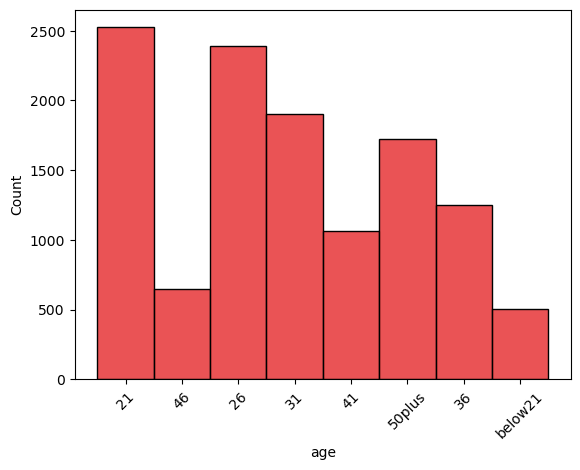

In [266]:
#That they are likely go to the bar at least 1+ a month, did not have a kid as passenger, and are not widowed.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  